In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)
morethan1400 = []
for row in df['shares']:
    if row > 1400:
        morethan1400.append(True)
    else:
        morethan1400.append(False)
df['morethan1400']= morethan1400

In [12]:
df['lifestyle'] = df['data_channel_is_lifestyle'].replace({1:"Lifestyle", 0:''})
df['entertainment'] = df['data_channel_is_entertainment'].replace({1:"Entertainment", 0:''})
df['bus'] = df['data_channel_is_bus'].replace({1:"Business", 0:''})
df['socmed'] = df['data_channel_is_socmed'].replace({1:"SocialMedia", 0:''})
df['tech'] = df['data_channel_is_tech'].replace({1:"Technology", 0:''})
df['world'] = df['data_channel_is_world'].replace({1:"World", 0:''})


df['channel'] = df['lifestyle']+df['entertainment']+df['bus']+df['socmed']+df['tech']+df['world']

shares_by_channel = df[['channel', 'shares']]

In [13]:
pivoted = shares_by_channel.pivot(index=None, columns='channel', values='shares')

In [14]:
pivoted.columns.values

array(['', 'Business', 'Entertainment', 'Lifestyle', 'SocialMedia',
       'Technology', 'World'], dtype=object)

In [16]:
Lifestyle = np.array(pivoted.Lifestyle)
Lifestyle = Lifestyle[~np.isnan(Lifestyle)]

Entertainment = np.array(pivoted.Entertainment)
Entertainment = Entertainment[~np.isnan(Entertainment)]

Business = np.array(pivoted.Business)
Business = Business[~np.isnan(Business)]

SocialMedia = np.array(pivoted.SocialMedia)
SocialMedia = SocialMedia[~np.isnan(SocialMedia)]

Tech = np.array(pivoted.Technology)
Tech = Tech[~np.isnan(Tech)]

World = np.array(pivoted.World)
World = World[~np.isnan(World)]

In [17]:
print(len(Lifestyle))
print(len(Entertainment))
print(len(Business))
print(len(SocialMedia))
print(len(Tech))
print(len(World))


2099
7057
6258
2323
7346
8427


In [18]:
Lifestyle = np.random.choice(Lifestyle, size=2000, replace=False)
Entertainment = np.random.choice(Entertainment, size=2000, replace=False)
Business = np.random.choice(Business, size=2000, replace=False)
SocialMedia = np.random.choice(SocialMedia, size=2000, replace=False)
Tech = np.random.choice(Tech, size=2000, replace=False)
World = np.random.choice(World, size=2000, replace=False)



In [19]:
Lifestyle = pd.Series(Lifestyle, name="Lifestyle")
Entertainment = pd.Series(Entertainment, name="Entertainment")
Business = pd.Series(Business, name="Business")
SocialMedia = pd.Series(SocialMedia, name="SocialMedia")
Tech = pd.Series(Tech, name="Tech")
World = pd.Series(World, name="World")


In [20]:
sampled_shares = pd.concat([Lifestyle, Entertainment, Business, SocialMedia, Tech, World], axis=1)

In [22]:
sampled_shares

,Lifestyle,Entertainment,Business,SocialMedia,Tech,World
0,692,3900,2000,23600,2200,1200
1,753,535,5400,2200,10100,863
2,1200,2300,864,403,642,844
3,420,705,5200,1100,3700,2200
4,4100,1700,2000,1500,1400,3000
5,774,18100,823,1200,1100,4300
6,2000,4300,1400,1700,3000,1100
7,732,11100,3300,2000,1400,1700
8,1300,484,746,819,1300,927
9,1500,1900,2400,857,1700,1500


In [21]:
sampled_shares.to_csv('sampledshares_channel.csv', index=False)

In [189]:

pivoted = pivoted[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

In [192]:
pivoted.to_csv('for_box_plot.csv', index=False)

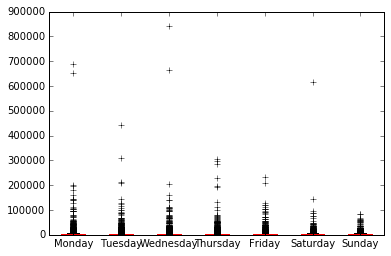

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

In [196]:

plt.show(pivoted.plot(kind = 'box'))
plt.set_xticklabels(np.arange(0, 10000, 1000))

shares_by_day.to_csv('shares_by_day.csv')

In [102]:
df.to_csv('binaryshares.csv')

In [106]:
df['weekday_is_monday']

0        Monday
1        Monday
2        Monday
3        Monday
4        Monday
5        Monday
6        Monday
7        Monday
8        Monday
9        Monday
10       Monday
11       Monday
12       Monday
13       Monday
14       Monday
15       Monday
16       Monday
17       Monday
18       Monday
19       Monday
20       Monday
21       Monday
22       Monday
23       Monday
24       Monday
25       Monday
26       Monday
27       Monday
28       Monday
29       Monday
          ...  
39614          
39615          
39616          
39617          
39618          
39619          
39620          
39621          
39622          
39623          
39624          
39625          
39626          
39627          
39628          
39629          
39630          
39631          
39632          
39633          
39634          
39635          
39636          
39637          
39638          
39639          
39640          
39641          
39642          
39643          
Name: weekday_is_monday,

In [70]:
df["days"] = df['weekday_is_monday'].astype(str)+df['weekday_is_tuesday'].astype(str)+df['weekday_is_wednesday'].astype(str)+df['weekday_is_thursday'].astype(str)+df['weekday_is_friday'].astype(str)+df['weekday_is_saturday'].astype(str)+df['weekday_is_sunday'].astype(str)

In [91]:
dayname = []
for row in day:
    
    if row is '1.00.00.00.00.00.00.0':
        dayname.append('Monday')
    elif row is '0.01.00.00.00.00.00.0':
        dayname.append('Tuesday')
    elif row is '0.00.01.00.00.00.00.0':
        dayname.append('Wednesday')
    elif row is '0.0.00.01.00.00.00.0':
        dayname.append('Thursday')
    elif row is '0.0.00.00.01.00.00.0':
        dayname.append('Friday')
    elif row is '0.0.00.00.00.01.00.0':
        dayname.append('Saturday')
    elif row is '0.0.00.00.00.0.01.0':
        dayname.append('Sunday')
# df['byday']=day

In [92]:
dayname


[]

In [57]:
df.shares.sort_values()

url
http://mashable.com/2013/12/09/wand-remote-control/                                                                  1
http://mashable.com/2013/04/01/troll-appreciation-day-tickets-2/                                                     4
http://mashable.com/2014/12/10/mad-max-trailer/                                                                      5
http://mashable.com/2013/07/11/nokia-lumia-1020/                                                                     8
http://mashable.com/2014/10/09/lying-down-for-jobs-during-the-great-depression/                                     22
http://mashable.com/2014/01/16/titanic-replica-theme-park/                                                          22
http://mashable.com/2013/07/10/tablets-education-competition/                                                       23
http://mashable.com/2014/10/23/air-new-zealand-hobbit-video/                                                        28
http://mashable.com/2014/10/10/battle-for-ko

In [20]:
df.columns.values

array(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words'

In [32]:
df = df.drop([['timedelta','is_weekend',]])